<a href="https://colab.research.google.com/github/SidharthBhakth/Image-Classification-with-ConvNets-in-TF-2.x/blob/master/1_Fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST classification

Image classification on Fashion MNIST dataset using a 2D convolutional neural network.

In [0]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [2]:
# Load in the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize
X_train, X_test = X_train / 255.0 , X_test / 255.0

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [3]:
# Reshape input data (to make it 3D)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [4]:
# Number of label classes
K = len(set(y_train))
print("Number of classes: {}".format(K))

Number of classes: 10


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# Build the model (using keras functional API)
i = Input(shape=X_train[0].shape)
x = Conv2D(filters=32, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D(filters=64, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5080 - accuracy: 0.8115 - val_loss: 0.3919 - val_accuracy: 0.8556
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3505 - accuracy: 0.8675 - val_loss: 0.3384 - val_accuracy: 0.8745
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3037 - accuracy: 0.8861 - val_loss: 0.3286 - val_accuracy: 0.8756
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2725 - accuracy: 0.8976 - val_loss: 0.2971 - val_accuracy: 0.8895
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9059 - val_loss: 0.3082 - val_accuracy: 0.8880
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2281 - accuracy: 0.9144 - val_loss: 0.2960 - val_accuracy: 0.8894
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2097 - accuracy: 0.9200 - val_loss: 0.3152 - val_accuracy:

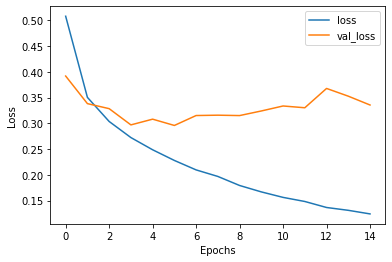

In [8]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

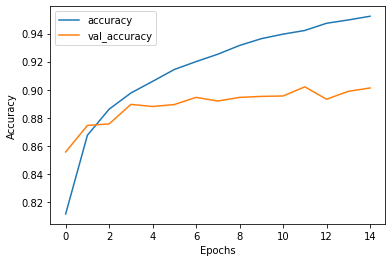

In [9]:
# Plot accuracy curve
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
# Predict
y_pred = model.predict(X_test).argmax(axis=1)

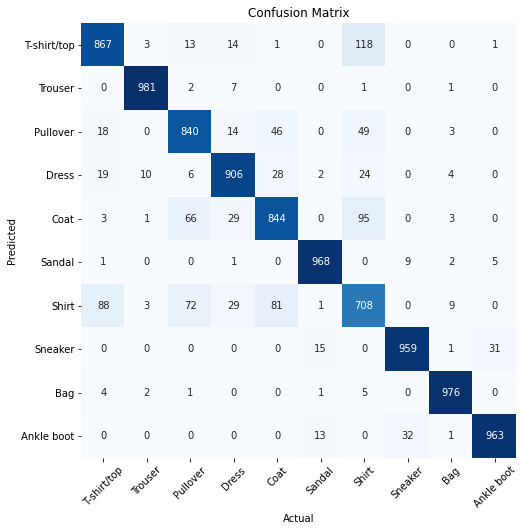

In [11]:
# Plot annotated confusion matrix
cnf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))

fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(class_names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(class_names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

Actual: Dress
Predicted: Coat




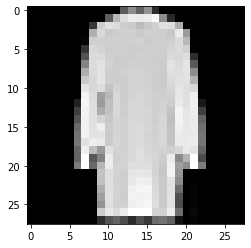

In [12]:
# View misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
idx = np.random.choice(misclassified_idx)

print("Actual: {}".format(class_names[y_test[idx]]))
print("Predicted: {}".format(class_names[y_pred[idx]]))
print("\n")

plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
plt.show()